# Customer Churn Prediction
The following is an analysis and prediction of customer churn using a dataset from an e-commerce company. The dataset consists of various customer information such as preferred login device, preferred payment mode, city tier, gender, marital status, satisfaction score, and other behavioral attributes.

In [57]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [58]:
# Load the data
ecom_df = pd.read_csv("Ecom.csv")

In [59]:
ecom_df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


In [60]:
# Drop unnecessary columns
ecom_df.drop(['CustomerID'],axis='columns',inplace=True)

In [61]:
# Handle missing values
ecom_df.dropna(inplace=True)

In [62]:
ecom_df.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
3,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
5,1,0.0,Computer,1,22.0,Debit Card,Female,3.0,5,Mobile Phone,5,Single,2,1,22.0,4.0,6.0,7.0,139
11,1,11.0,Mobile Phone,1,6.0,Debit Card,Male,3.0,4,Fashion,3,Single,10,1,13.0,0.0,1.0,0.0,154
12,1,0.0,Phone,1,11.0,COD,Male,2.0,3,Mobile,3,Single,2,1,13.0,2.0,2.0,2.0,134


## Analyze data types and unique values

In [63]:
ecom_df.dtypes

Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                   int64
dtype: object

In [64]:
ecom_df.nunique()

Churn                           2
Tenure                         34
PreferredLoginDevice            3
CityTier                        3
WarehouseToHome                34
PreferredPaymentMode            7
Gender                          2
HourSpendOnApp                  6
NumberOfDeviceRegistered        6
PreferedOrderCat                6
SatisfactionScore               5
MaritalStatus                   3
NumberOfAddress                14
Complain                        2
OrderAmountHikeFromlastYear    16
CouponUsed                     15
OrderCount                     16
DaySinceLastOrder              22
CashbackAmount                 96
dtype: int64

# Visualize the distribution of customer churn

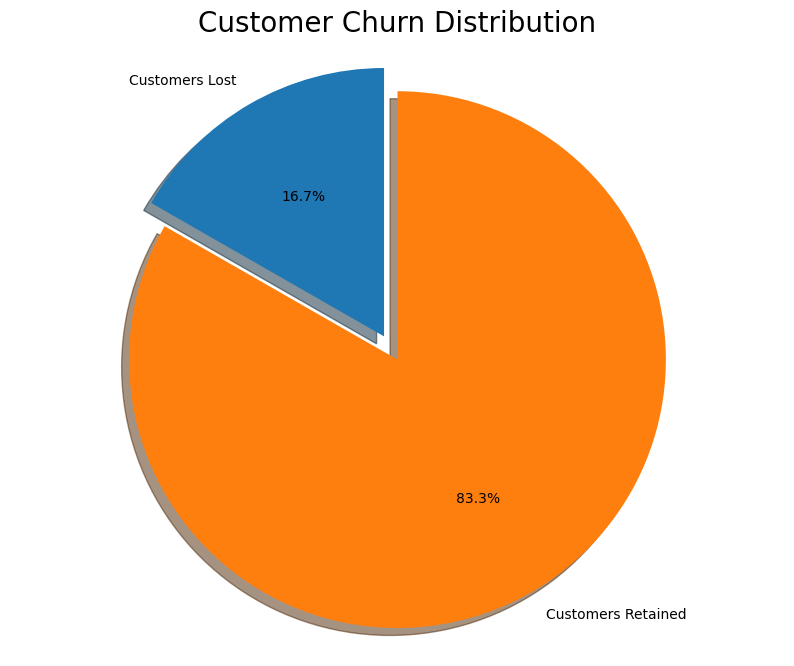

In [65]:
# Define the labels and sizes
labels = ['Customers Lost', 'Customers Retained']
sizes = [ecom_df.Churn[ecom_df['Churn']==1].count(), ecom_df.Churn[ecom_df['Churn']==0].count()]
explode_tuple = (0.1, 0)  # only "explode" 'Customers Lost'

# Create the figure and the axes
fig, ax = plt.subplots(figsize=(10, 8))

# Generate the pie chart
ax.pie(sizes, explode=explode_tuple, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

# Ensure pie is drawn as a circle
ax.axis('equal')

# Set the title
plt.title("Customer Churn Distribution", size = 20)

# Display the chart
plt.show()


# Visualize the relation of different factors with customer churn

In [66]:
import seaborn as sns

<Axes: xlabel='SatisfactionScore', ylabel='count'>

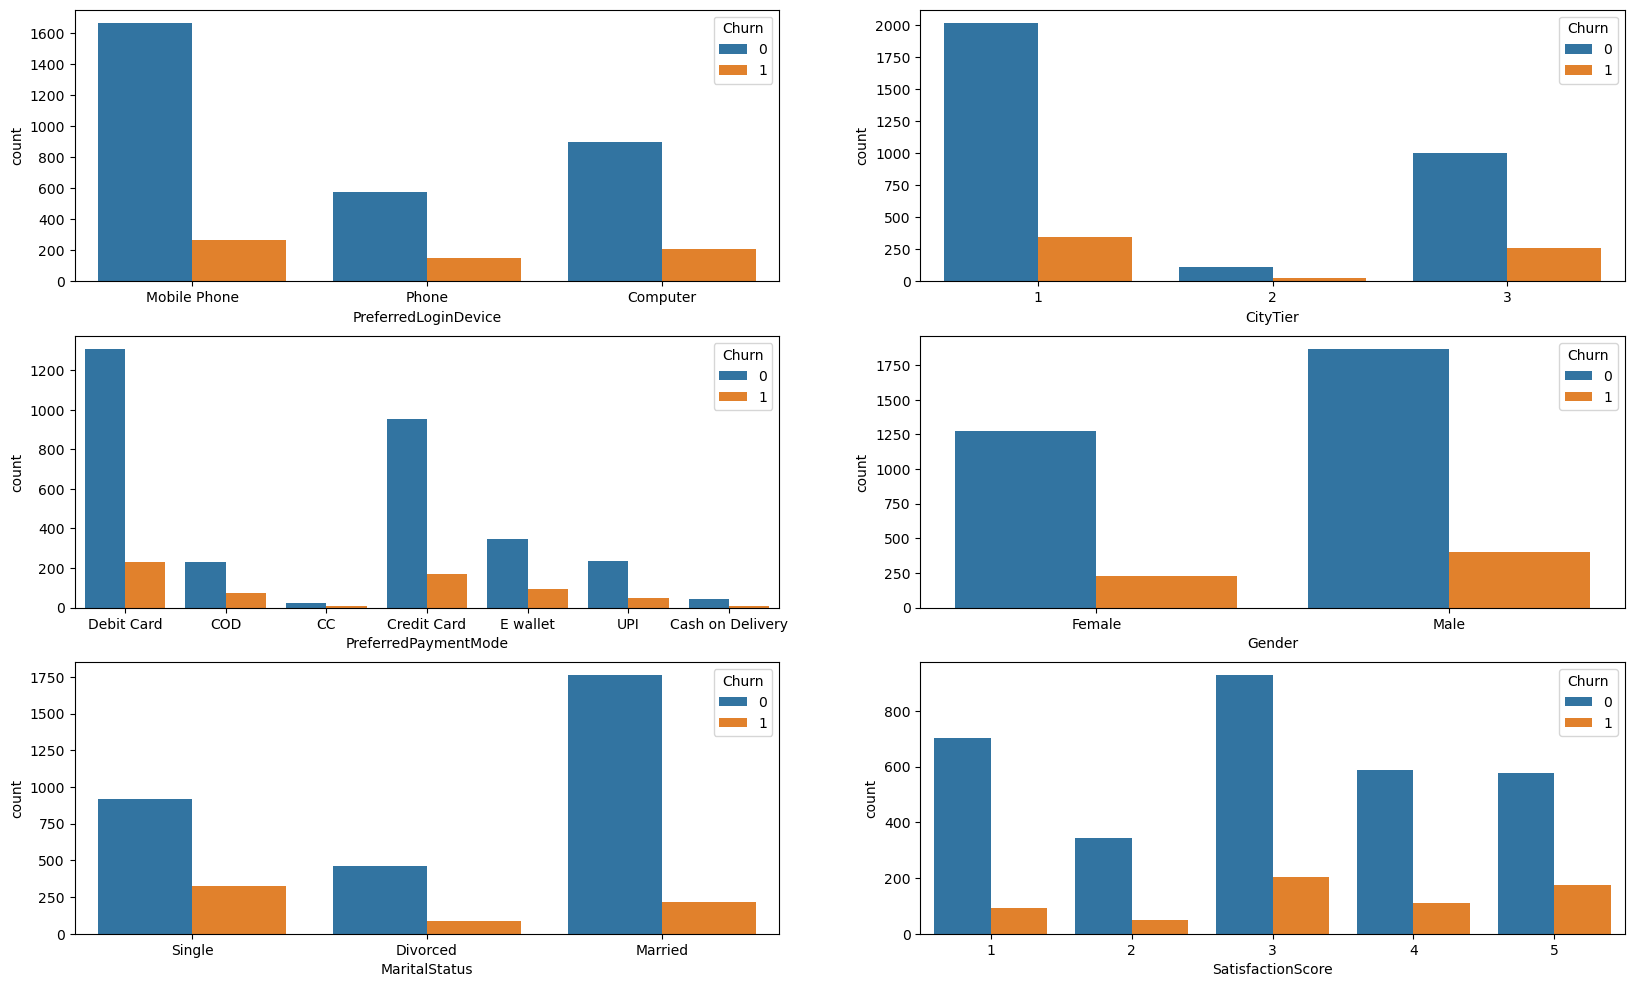

In [67]:
    # We first review the 'Status' relation with categorical variables
    fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
    sns.countplot(x='PreferredLoginDevice', hue = 'Churn',data = ecom_df, ax=axarr[0][0])
    sns.countplot(x='CityTier', hue = 'Churn',data = ecom_df, ax=axarr[0][1])
    sns.countplot(x='PreferredPaymentMode', hue = 'Churn',data = ecom_df, ax=axarr[1][0])
    sns.countplot(x='Gender', hue = 'Churn',data = ecom_df, ax=axarr[1][1])
    sns.countplot(x='MaritalStatus', hue = 'Churn',data = ecom_df, ax=axarr[2][0])
    sns.countplot(x='SatisfactionScore', hue = 'Churn',data = ecom_df, ax=axarr[2][1])
    
    

<Axes: xlabel='Churn', ylabel='CashbackAmount'>

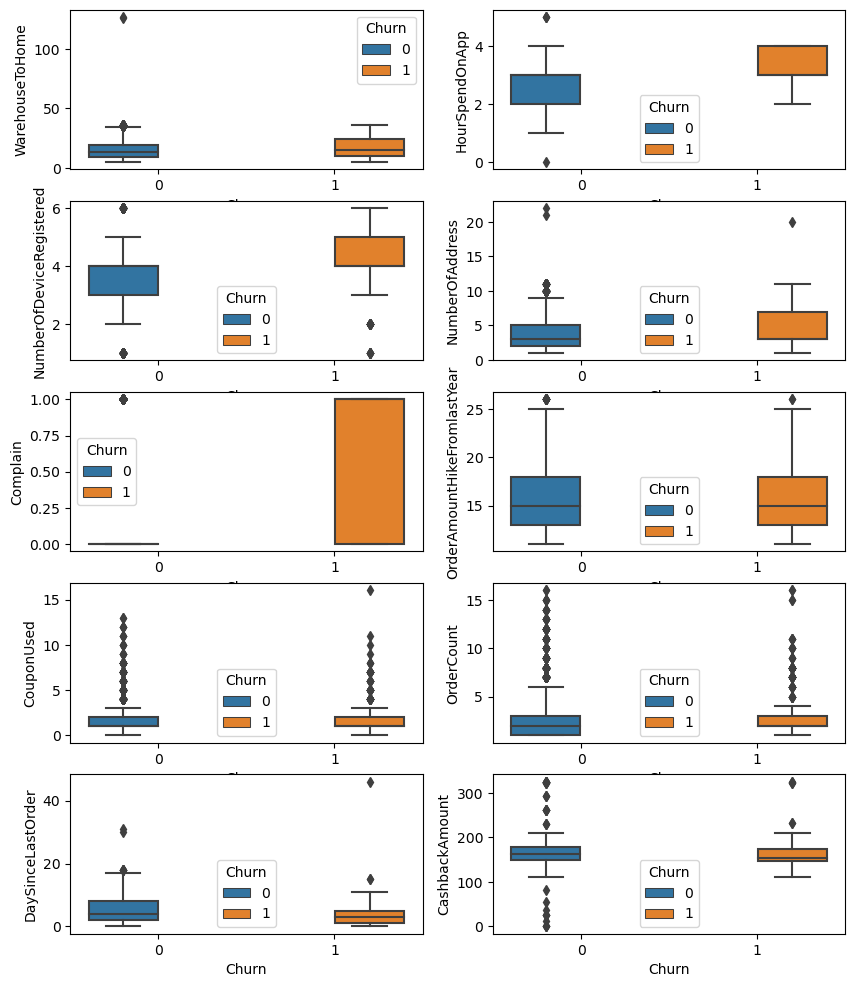

In [68]:
fig, axarr = plt.subplots(5, 2, figsize=(10, 12))
sns.boxplot(y='WarehouseToHome',x = 'Churn', hue = 'Churn',data = ecom_df, ax=axarr[0][0])
sns.boxplot(y='HourSpendOnApp',x = 'Churn', hue = 'Churn',data = ecom_df , ax=axarr[0][1])
sns.boxplot(y='NumberOfDeviceRegistered',x = 'Churn', hue = 'Churn',data = ecom_df, ax=axarr[1][0])
sns.boxplot(y='NumberOfAddress',x = 'Churn', hue = 'Churn',data = ecom_df, ax=axarr[1][1])
sns.boxplot(y='Complain',x = 'Churn', hue = 'Churn',data = ecom_df, ax=axarr[2][0])
sns.boxplot(y='OrderAmountHikeFromlastYear',x = 'Churn', hue = 'Churn',data = ecom_df, ax=axarr[2][1])
sns.boxplot(y='CouponUsed',x = 'Churn', hue = 'Churn',data = ecom_df, ax=axarr[3][0])
sns.boxplot(y='OrderCount',x = 'Churn', hue = 'Churn',data = ecom_df, ax=axarr[3][1])
sns.boxplot(y='DaySinceLastOrder',x = 'Churn', hue = 'Churn',data = ecom_df, ax=axarr[4][0])
sns.boxplot(y='CashbackAmount',x = 'Churn', hue = 'Churn',data = ecom_df, ax=axarr[4][1])

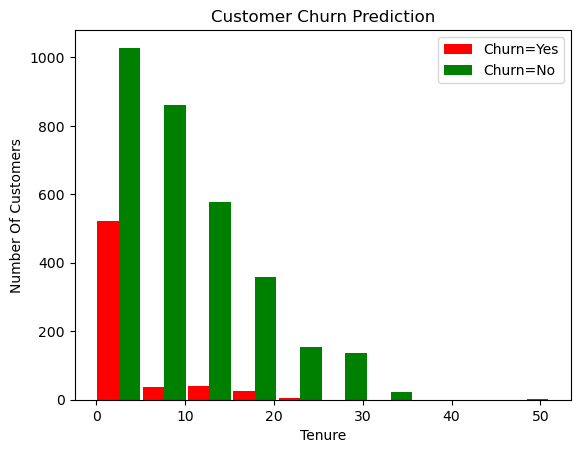

In [69]:
tenure_retained = ecom_df[ecom_df.Churn==0].Tenure
tenure_churned = ecom_df[ecom_df.Churn==1].Tenure

plt.xlabel("Tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction")

plt.hist([tenure_churned, tenure_retained], rwidth=0.95, color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [70]:
def remove_outliers(tenure):
    Q1_churned = tenure.quantile(0.25)
    Q3_churned = tenure.quantile(0.75)
    IQR_churned = Q3_churned - Q1_churned
    filter_churned = (tenure >= Q1_churned - 1.5 * IQR_churned) & (tenure <= Q3_churned + 1.5 *IQR_churned)
    return tenure[filter_churned]


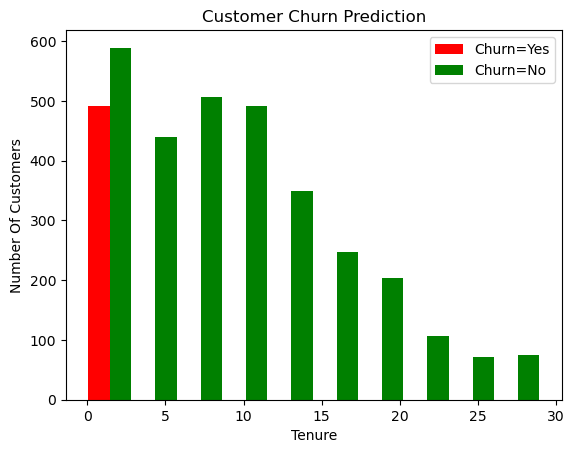

In [71]:
plt.xlabel("Tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction")

plt.hist([remove_outliers(tenure_churned), remove_outliers(tenure_retained)], rwidth=0.95, color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.legend()

# Feature Engineering
Next, we perform some feature engineering to prepare the data for the model. This involves handling categorical variables using label encoding and one-hot encoding, and scaling continuous variables.

# Handle categorical variables

In [72]:
def find_categorical_var(df):
       for col in df:
            if df[col].dtypes=='object':
                print(f'{col}: {df[col].unique()}')

In [73]:
find_categorical_var(ecom_df)

PreferredLoginDevice: ['Mobile Phone' 'Phone' 'Computer']
PreferredPaymentMode: ['Debit Card' 'COD' 'CC' 'Credit Card' 'E wallet' 'UPI' 'Cash on Delivery']
Gender: ['Female' 'Male']
PreferedOrderCat: ['Laptop & Accessory' 'Mobile Phone' 'Fashion' 'Mobile' 'Others' 'Grocery']
MaritalStatus: ['Single' 'Divorced' 'Married']


In [74]:
ecom_df['Gender'].replace({'Male': 1,'Female': 0},inplace=True)

In [75]:
ecom_df1 = pd.get_dummies(data=ecom_df, columns=['PreferredLoginDevice', 'PreferredPaymentMode', 'PreferedOrderCat', 'MaritalStatus'])
ecom_df1.head()


,Churn,Tenure,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,...,PreferredPaymentMode_UPI,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,1,4.0,3,6.0,0,3.0,3,2,9,1,...,0,0,0,1,0,0,0,0,0,1
3,1,0.0,3,15.0,1,2.0,4,5,8,0,...,0,0,0,1,0,0,0,0,0,1
5,1,0.0,1,22.0,0,3.0,5,5,2,1,...,0,0,0,0,0,1,0,0,0,1
11,1,11.0,1,6.0,1,3.0,4,3,10,1,...,0,1,0,0,0,0,0,0,0,1
12,1,0.0,1,11.0,1,2.0,3,3,2,1,...,0,0,0,0,1,0,0,0,0,1


# Scale continuous variables

In [76]:
scale_var = ['WarehouseToHome','HourSpendOnApp','NumberOfDeviceRegistered','NumberOfAddress','OrderAmountHikeFromlastYear','CouponUsed','OrderCount','DaySinceLastOrder','CashbackAmount']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
ecom_df1[scale_var] = scaler.fit_transform(ecom_df1[scale_var])

In [77]:
ecom_df1.head()

,Churn,Tenure,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,...,PreferredPaymentMode_UPI,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,1,4.0,3,0.008197,0,0.6,0.4,2,0.380952,1,...,0,0,0,1,0,0,0,0,0,1
3,1,0.0,3,0.081967,1,0.4,0.6,5,0.333333,0,...,0,0,0,1,0,0,0,0,0,1
5,1,0.0,1,0.139344,0,0.6,0.8,5,0.047619,1,...,0,0,0,0,0,1,0,0,0,1
11,1,11.0,1,0.008197,1,0.6,0.6,3,0.428571,1,...,0,1,0,0,0,0,0,0,0,1
12,1,0.0,1,0.049180,1,0.4,0.4,3,0.047619,1,...,0,0,0,0,1,0,0,0,0,1


# Model Building and Evaluation
Finally, we split the data into training and test sets and build a predictive model using a Neural Network. We then evaluate the model performance on the test set.

In [78]:
X = ecom_df1.drop('Churn',axis='columns')  ##independent features
y = ecom_df1['Churn']  ##dependent feature

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [79]:
len(X_train.columns)

33

# Build the model

In [80]:
import tensorflow as tf
from tensorflow import keras

 
model = keras.Sequential([
    keras.layers.Dense(12, input_shape=(33,), activation='relu'),
    keras.layers.Dense(6, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])



model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
95/95 [==============================] - 0s 567us/step - loss: 0.7881 - accuracy: 0.5684
Epoch 2/100
95/95 [==============================] - 0s 505us/step - loss: 0.3534 - accuracy: 0.8480
Epoch 3/100
95/95 [==============================] - 0s 510us/step - loss: 0.3206 - accuracy: 0.8705
Epoch 4/100
95/95 [==============================] - 0s 500us/step - loss: 0.3094 - accuracy: 0.8798
Epoch 5/100
95/95 [==============================] - 0s 502us/step - loss: 0.3012 - accuracy: 0.8897
Epoch 6/100
95/95 [==============================] - 0s 497us/step - loss: 0.2946 - accuracy: 0.8933
Epoch 7/100
95/95 [==============================] - 0s 510us/step - loss: 0.2883 - accuracy: 0.8967
Epoch 8/100
95/95 [==============================] - 0s 503us/step - loss: 0.2839 - accuracy: 0.8967
Epoch 9/100
95/95 [==============================] - 0s 504us/step - loss: 0.2775 - accuracy: 0.8973
Epoch 10/100
95/95 [==============================] - 0s 495us/step - loss: 0.2740 - accura

95/95 [==============================] - 0s 509us/step - loss: 0.2122 - accuracy: 0.9162
Epoch 82/100
95/95 [==============================] - 0s 501us/step - loss: 0.2123 - accuracy: 0.9165
Epoch 83/100
95/95 [==============================] - 0s 485us/step - loss: 0.2134 - accuracy: 0.9172
Epoch 84/100
95/95 [==============================] - 0s 485us/step - loss: 0.2109 - accuracy: 0.9175
Epoch 85/100
95/95 [==============================] - 0s 485us/step - loss: 0.2107 - accuracy: 0.9162
Epoch 86/100
95/95 [==============================] - 0s 482us/step - loss: 0.2100 - accuracy: 0.9165
Epoch 87/100
95/95 [==============================] - 0s 485us/step - loss: 0.2098 - accuracy: 0.9149
Epoch 88/100
95/95 [==============================] - 0s 483us/step - loss: 0.2114 - accuracy: 0.9119
Epoch 89/100
95/95 [==============================] - 0s 486us/step - loss: 0.2124 - accuracy: 0.9169
Epoch 90/100
95/95 [==============================] - 0s 484us/step - loss: 0.2094 - accuracy: 

In [81]:
model.evaluate(X_test, y_test)

24/24 [==============================] - 0s 506us/step - loss: 0.2554 - accuracy: 0.9086


[0.255431205034256, 0.9086092710494995]

In [82]:
yp = model.predict(X_test)
yp

24/24 [==============================] - 0s 391us/step


array([[4.23865952e-03],
       [6.25241594e-03],
       [6.60283342e-02],
       [3.74227792e-01],
       [9.03623831e-03],
       [3.53813976e-01],
       [7.09931878e-03],
       [1.15752891e-02],
       [3.16211535e-03],
       [6.89086970e-04],
       [8.56441446e-03],
       [2.28617877e-01],
       [4.11707498e-02],
       [8.48456249e-02],
       [5.57427369e-02],
       [7.02012051e-03],
       [9.68522653e-02],
       [9.47675884e-01],
       [4.86810021e-02],
       [1.37883676e-02],
       [2.16782726e-02],
       [1.03108697e-02],
       [1.94536976e-03],
       [2.67199893e-02],
       [2.01644916e-02],
       [1.07398473e-01],
       [7.14965463e-02],
       [8.84151552e-03],
       [3.67830545e-02],
       [1.56674266e-01],
       [1.60519816e-02],
       [1.49111617e-02],
       [8.44022274e-01],
       [1.08163469e-02],
       [1.65204890e-02],
       [7.89466966e-03],
       [4.57733184e-01],
       [1.30809233e-01],
       [2.04893220e-02],
       [1.45443052e-01],


## Converting our predictions to 0,1 to check accuracy

In [83]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

## Checking the accuracy

In [84]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       624
           1       0.83      0.60      0.69       131

    accuracy                           0.91       755
   macro avg       0.87      0.78      0.82       755
weighted avg       0.90      0.91      0.90       755



Text(95.72222222222221, 0.5, 'Truth')

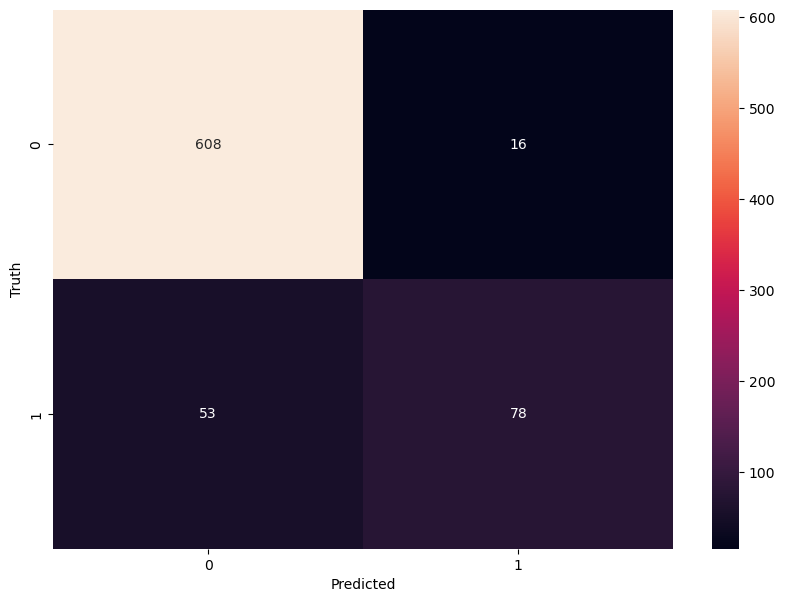

In [85]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [86]:
from sklearn.metrics import accuracy_score

In [87]:
print("Accuracy score is: ", accuracy_score(y_test,y_pred)*100,"%")

Accuracy score is:  90.86092715231788 %
